In [ ]:
# Danika Mariam (1004014880)
# INF2178: Assignment 3

import pandas as pd

# Load the dataset
# load dataset
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
data = pd.read_csv("/drive/MyDrive/INF2178_A3_data.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of income groups
print(data['incomegroup'].value_counts())

# Distribution of scores
score_columns = ['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']
print(data[score_columns].hist(figsize=(10, 8)))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Combining fall and spring reading scores
data['combined_reading_score'] = (data['fallreadingscore'] + data['springreadingscore']) / 2

# Combining fall and spring math scores
data['combined_math_score'] = (data['fallmathscore'] + data['springmathscore']) / 2

# Combining fall and spring general knowledge scores
data['combined_general_knowledge_score'] = (data['fallgeneralknowledgescore'] + data['springgeneralknowledgescore']) / 2

# Conduct ANCOVA for combined reading scores
model_combined_reading = ols('combined_reading_score ~ C(incomegroup) + totalhouseholdincome', data=data).fit()
print(model_combined_reading.summary())

# Conduct ANCOVA for combined math scores
model_combined_math = ols('combined_math_score ~ C(incomegroup) + totalhouseholdincome', data=data).fit()
print(model_combined_math.summary())

# Conduct ANCOVA for combined general knowledge scores
model_combined_general_knowledge = ols('combined_general_knowledge_score ~ C(incomegroup) + totalhouseholdincome', data=data).fit()
print(model_combined_general_knowledge.summary())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Interaction plot for fall reading scores
sns.pointplot(x='incomegroup', y='fallreadingscore', data=data, ci=None)
plt.title('Interaction Plot for Fall Reading Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Fall Reading Score')
plt.show()

# Interaction plot for spring reading scores
sns.pointplot(x='incomegroup', y='springreadingscore', data=data, ci=None)
plt.title('Interaction Plot for Spring Reading Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Spring Reading Score')
plt.show()

# Interaction plot for fall math scores
sns.pointplot(x='incomegroup', y='fallmathscore', data=data, ci=None)
plt.title('Interaction Plot for Fall Math Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Fall Math Score')
plt.show()

# Interaction plot for spring math scores
sns.pointplot(x='incomegroup', y='springmathscore', data=data, ci=None)
plt.title('Interaction Plot for Spring Math Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Spring Math Score')
plt.show()

# Interaction plot for fall general knowledge scores
sns.pointplot(x='incomegroup', y='fallgeneralknowledgescore', data=data, ci=None)
plt.title('Interaction Plot for Fall General Knowledge Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Fall General Knowledge')
plt.show()

# Interaction plot for spring general knowledge scores
sns.pointplot(x='incomegroup', y='springgeneralknowledgescore', data=data, ci=None)
plt.title('Interaction Plot for Spring General Knowledge Scores')
plt.xlabel('Income Group')
plt.ylabel('Mean Spring General Knowledge')
plt.show()



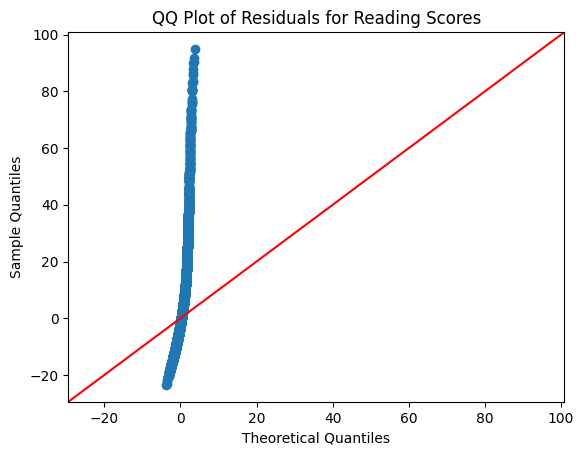

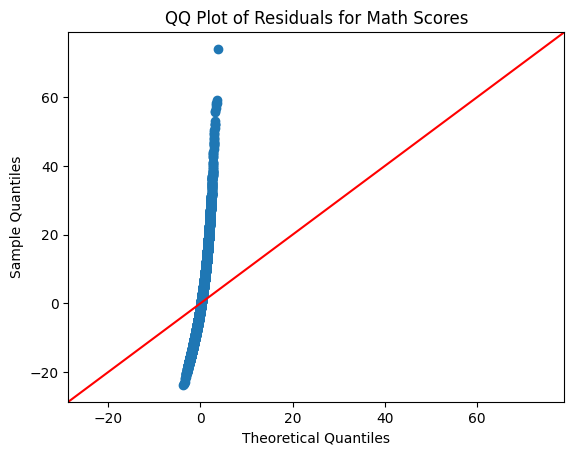

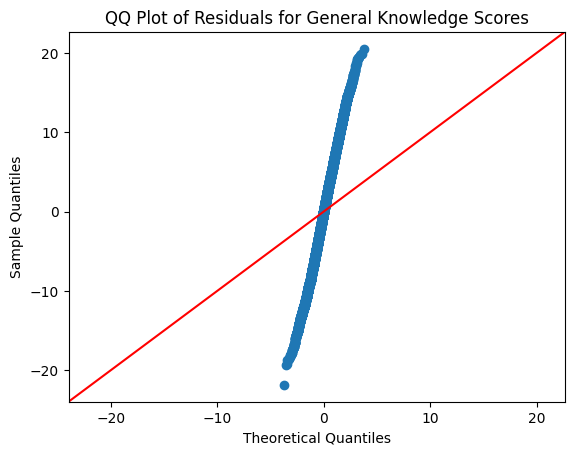

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ plot for Reading Scores
sm.qqplot(model_combined_reading.resid, line ='45')
plt.title('QQ Plot of Residuals for Reading Scores')
plt.show()

# QQ plot for Math Scores
sm.qqplot(model_combined_math.resid, line ='45')
plt.title('QQ Plot of Residuals for Math Scores')
plt.show()

# QQ plot for General Knowledge Scores
sm.qqplot(model_combined_general_knowledge.resid, line ='45')
plt.title('QQ Plot of Residuals for General Knowledge Scores')
plt.show()

